# Grand Average Analysis

In this file we investigate the grand average of all subjets in the TSN study.

---

This notebook reads in the *-ave.fif evoked files from individual subjects that were produced by the individual subject preprocessing notebooks. 

Assumes that the data from each subject are in a sub-folder named for that subject, and that these subject sub-folders are in the same folder as this script.

---
Based on work by Aaron J Newman; Copyright (c) 2016 Aaron J Newman, NeuroCognitive Imaging Lab, Dalhousie University

This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301, USA.

---

In [1]:
# This is an attempt to produce the results without repeating the analytical steps using the evokeds files.

%matplotlib inline
import matplotlib as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300  
figsize=(4, 4)

import mne
import mne.stats
import numpy as np
mne.set_log_level('error')

data_path = '..'

subjects = [
    #'01', pilot
    #'02', pilot
    #'03', pilot
    #'04_pilot' - omitted due to recording errors
    '04',
    '05',
    '06',
    '07',
    '08',
    '09',
    '10',
    '11',
    #'12', - omitted due to low quality
    '13',
    '14',
    '15',
    '16',
    '17',
    '18',
    '19',
    '20',
    '21',
    '22',
    '23',
    '24'
]

## Specify time windows of interest

In [2]:
P3_timewin = (0.200, 0.600) 
LPP_timewin = (0.600, 2.000)

## Difference waves which you may want to compute

In [3]:
conditions = ['Mind_Wandering_Standard', 'Mind_Wandering_Oddball', 'On_Task_Standard', 'On_Task_Oddball']

contrasts = {'warn-onli':['warn', 'onli'],
             'warn-neut':['warn', 'neut'],
             'warn-posi':['warn', 'posi'],
             'warn-nega':['warn', 'nega'],
             'onli-neut':['onli', 'neut']
            }

## Load evokeds

In [4]:
evoked = {}
for subject in subjects:
    evoked[subject] = mne.read_evokeds(str(data_path + '/Data/' + subject + '/' +  subject + '-ave.fif'))

evoked

{'04': [<Evoked | 'nega' (average, N=32), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'neut' (average, N=29), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'onli' (average, N=31), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'posi' (average, N=29), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'warn' (average, N=30), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>],
 '05': [<Evoked | 'nega' (average, N=24), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'neut' (average, N=25), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'onli' (average, N=25), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'posi' (average, N=22), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'warn' (average, N=26), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>],
 '06': [<Evoked | 'nega' (average, N=32), -0.19922 – 2 sec, baseline off, 32 ch, ~333 kB>,
  <Evoked | 'neut' (average, N=32), -0.19922 

## Create grand averages for each condition

In [5]:
gavg = {} 

gavg['nega'] = mne.grand_average([evoked[subj][0] for subj in subjects])
gavg['neut'] = mne.grand_average([evoked[subj][1] for subj in subjects])
gavg['onli'] = mne.grand_average([evoked[subj][2] for subj in subjects])
gavg['posi'] = mne.grand_average([evoked[subj][3] for subj in subjects])
gavg['warn'] = mne.grand_average([evoked[subj][4] for subj in subjects])

gavg

{'nega': <Evoked | 'Grand average (n = 20)' (average, N=20), -0.19922 – 2 sec, baseline off, 29 ch, ~303 kB>,
 'neut': <Evoked | 'Grand average (n = 20)' (average, N=20), -0.19922 – 2 sec, baseline off, 29 ch, ~303 kB>,
 'onli': <Evoked | 'Grand average (n = 20)' (average, N=20), -0.19922 – 2 sec, baseline off, 29 ch, ~303 kB>,
 'posi': <Evoked | 'Grand average (n = 20)' (average, N=20), -0.19922 – 2 sec, baseline off, 29 ch, ~303 kB>,
 'warn': <Evoked | 'Grand average (n = 20)' (average, N=20), -0.19922 – 2 sec, baseline off, 29 ch, ~303 kB>}

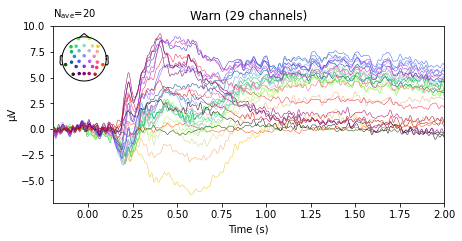

In [6]:
%matplotlib inline
gavg['warn'].plot(spatial_colors=True, titles="Warn");

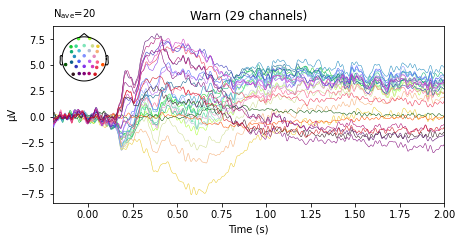

In [7]:
gavg['onli'].plot(spatial_colors=True, titles="Warn");

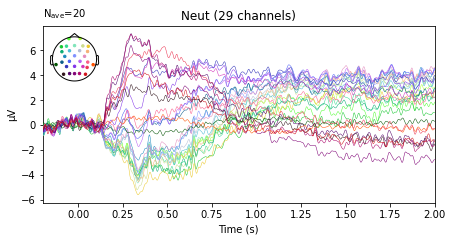

In [8]:
gavg['neut'].plot(spatial_colors=True, titles="Neut");

## Plot peaks for each condition

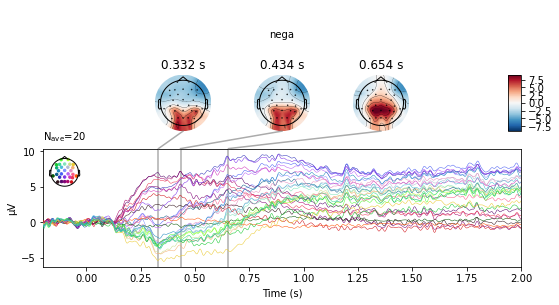

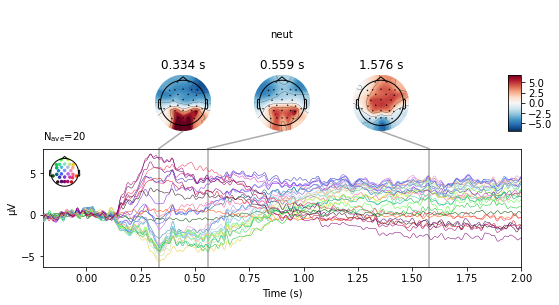

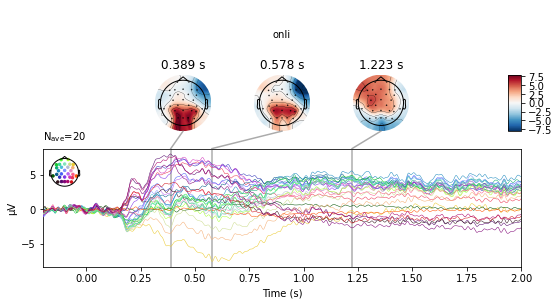

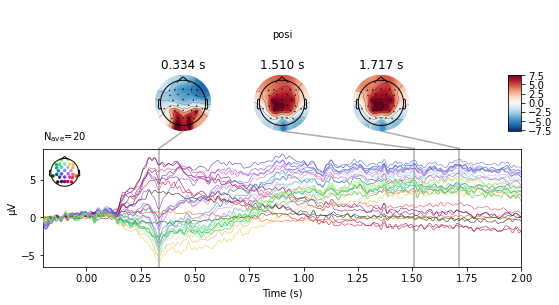

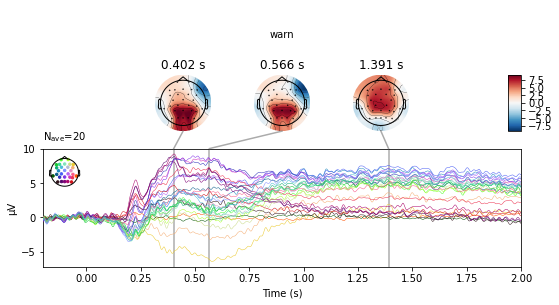

In [9]:
for cond in gavg:
    [gavg[cond].plot_joint(times='peaks', title=cond)];

## Plot topomaps for each condition

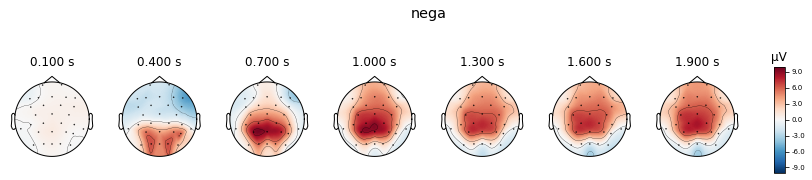

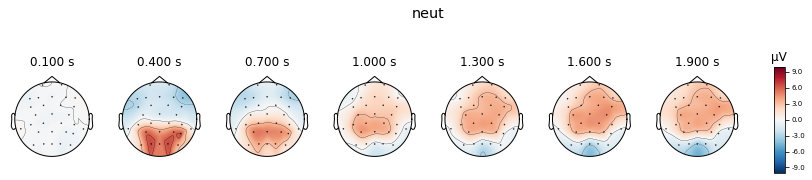

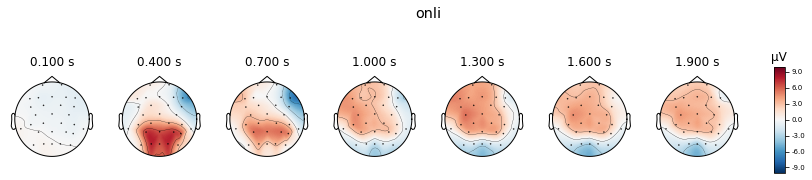

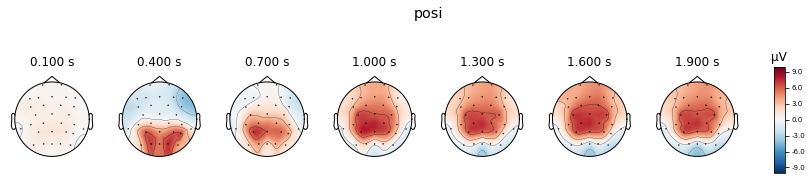

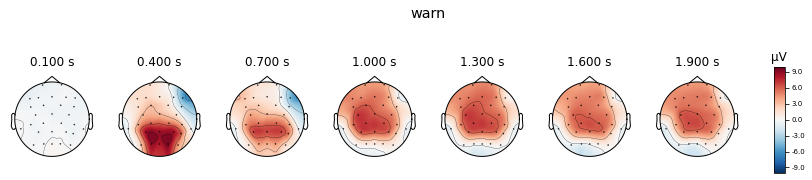

In [10]:
times = np.arange(0.1, 2.000, 0.3)

for cond in gavg:
    [gavg[cond].plot_topomap(times=times, title=cond, vmin=-10, vmax=10)];

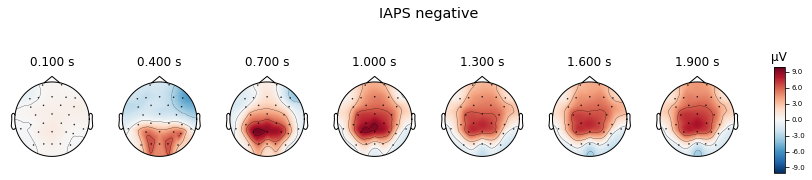

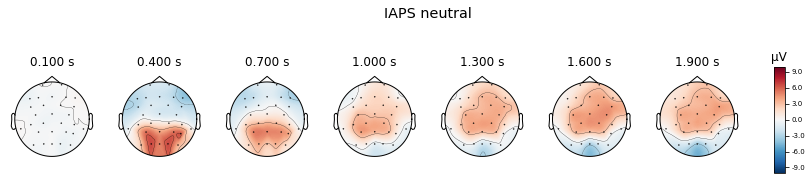

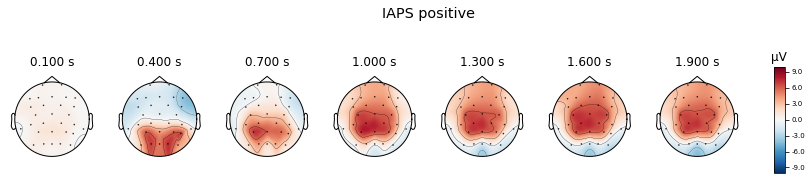

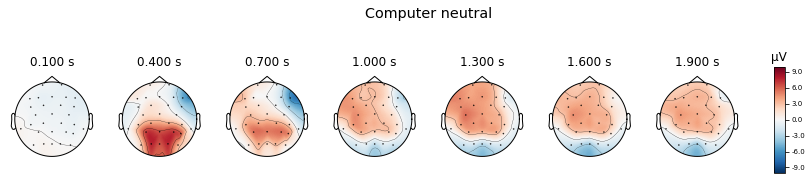

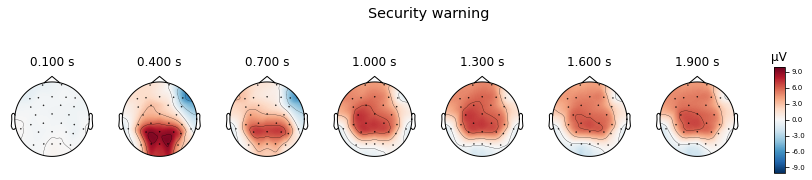

In [11]:
nega = gavg['nega'].plot_topomap(times=times, title='IAPS negative', vmin=-10, vmax=10)
nega.dpi = 160
nega.savefig('fig1_t-nega.png')

neut = gavg['neut'].plot_topomap(times=times, title='IAPS neutral', vmin=-10, vmax=10)
neut.dpi = 160
neut.savefig('fig1_t-neut.png')

posi = gavg['posi'].plot_topomap(times=times, title='IAPS positive', vmin=-10, vmax=10)
posi.dpi = 160
posi.savefig('fig1_t-posi.png')

onli = gavg['onli'].plot_topomap(times=times, title='Computer neutral', vmin=-10, vmax=10)
onli.dpi = 160
onli.savefig('fig1_t-onli.png')

warn = gavg['warn'].plot_topomap(times=times, title='Security warning', vmin=-10, vmax=10)
warn.dpi = 160
warn.savefig('fig1_t-warn.png')

## Plot waveforms

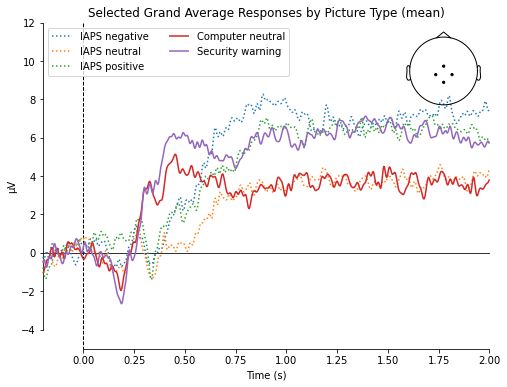

In [15]:
comparisons = {'IAPS negative':gavg['nega'], 'IAPS neutral':gavg['neut'], 'IAPS positive':gavg['posi'], 'Computer neutral':gavg['onli'], 'Security warning':gavg['warn']  }

picks = [gavg['nega'].ch_names.index('Cz'),
         gavg['nega'].ch_names.index('CP1'),
         gavg['nega'].ch_names.index('CP2'),
         gavg['nega'].ch_names.index('Pz'),
        ]

styles = {
    'IAPS negative': 'dotted',
    'IAPS neutral': 'dotted',
    'IAPS positive': 'dotted',
    'Computer neutral': 'solid',
    'Security warning': 'solid'
}
         
comp = mne.viz.plot_compare_evokeds(comparisons, 
                 picks=picks, 
                 ylim = dict(eeg=[-5, 12]),
                 title="Selected Grand Average Responses by Picture Type",
                 combine="mean",
                 linestyles=styles,
                 show_sensors=True)

comp[0].dpi = 300
comp[0].savefig('fig2_grand_average.png')